In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# source: https://www.kaggle.com/arnabd2002/svc-classifier
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import librosa

from librosa import display as dsp
from matplotlib import pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential

# Any results you write to the current directory are saved as output.

['A', 'B', 'D', 'E', 'EH', 'G']


In [6]:
soundLabel=[]
soundData=[]
rawData=[]

baseDir = os.path.join("data", "guitar_sample")
mfccSingularList=list()

for folder in os.listdir(baseDir):
    for file in os.listdir(os.path.join(baseDir, folder)):
        tempAudioData = list()
        audioData,sampleRate = librosa.core.load(os.path.join(baseDir, folder, file), res_type='kaiser_fast')

        rawData.append(audioData)
        spectralData = librosa.feature.spectral_bandwidth(y=audioData, sr=sampleRate)

        for sd in spectralData:
            tempAudioData.append(sd)

        soundData.append(tempAudioData)
        soundLabel.append(folder)
    
print('Done')

Done


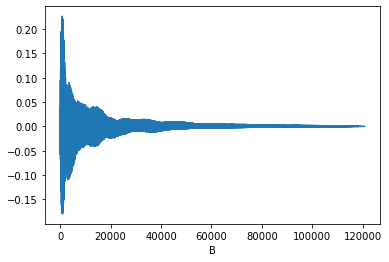

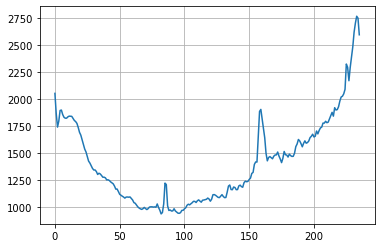

In [42]:
idx=np.random.randint(len(soundData))

plt.plot(rawData[idx])
plt.xlabel(soundLabel[idx])
plt.show()

plt.plot(soundData[idx][0])
plt.grid()
plt.show()

In [13]:
X=[]
for s in soundData:
    for val in s:
        X.append(val)

In [43]:
maxlen

365

In [14]:
print(max([len(x) for x in X]))
maxlen=max([len(x) for x in X])

X = pad_sequences(X, maxlen=maxlen)
np.shape(X)

365


(58, 365)

In [16]:
X

array([[   0,    0,    0, ..., 1568, 1912, 2344],
       [   0,    0,    0, ..., 3087, 3124, 2763],
       [   0,    0,    0, ..., 1458, 1743, 2164],
       ...,
       [   0,    0,    0, ..., 1979, 2243, 2531],
       [   0,    0,    0, ..., 2267, 2600, 2643],
       [   0,    0,    0, ..., 2772, 2775,    0]])

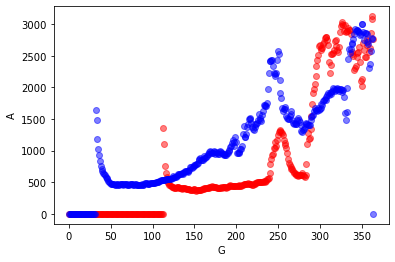

In [21]:
idx1, idx2=np.random.randint(len(X)),np.random.randint(len(X))

plt.scatter(list(range(len(X[idx1]))), X[idx2], c='r', alpha=0.5)
plt.scatter(list(range(len(X[idx1]))), X[idx1], c='b', alpha=0.5)

plt.xlabel(soundLabel[idx1])
plt.ylabel(soundLabel[idx2])
plt.show()

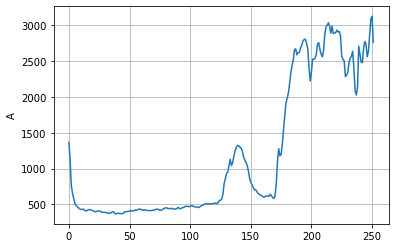

In [22]:
idx=np.random.randint(len(X))

plt.plot(soundData[idx][0])
plt.ylabel(soundLabel[idx])

plt.grid()
plt.show()

In [23]:
np.shape(X)

(58, 365)

In [24]:
num_classes=len(set(soundLabel))
num_classes

6

In [25]:
targetLabelEncoder=LabelEncoder()
y=targetLabelEncoder.fit_transform(soundLabel)
#X=X.reshape(X.shape[0],X.shape[1],1)
#y=to_categorical(y=target,num_classes=num_classes)
#input_shape=(X.shape[1],1)

In [26]:
np.shape(X),np.shape(y)

((58, 365), (58,))

In [27]:
from sklearn.svm import SVC

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=43)
svcClf=SVC()
svcClf.fit(X,y)
print('Accuracy:',svcClf.score(X_test,y_test))

Accuracy: 0.6666666666666666


In [40]:
idx=np.random.randint(len(X_test))

print('Pred:',targetLabelEncoder.inverse_transform(svcClf.predict([X_test[idx]]))[0])
print('Actual:',targetLabelEncoder.inverse_transform(y_test[idx:idx+1]))

Pred: E
Actual: ['E']
